In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pylab as plt

import os
import numpy as np
import pandas as pd

# Ignore the commented code in the next few boxes...

In [1]:
# import plotly
# import plotly.plotly as py
# from plotly.graph_objs import *

# plotly.tools.set_credentials_file(username='rfeinman', api_key='rQnQLGa7Eu4KAk6RwYsP')

In [ ]:
# layout_ct = Layout(
#     autosize=False,
#     width=1000,
#     height=1000,
#     xaxis=dict(
#         autotick=False,
#         ticks='outside',
#         tick0=0,
#         dtick=1,
#         ticklen=8,
#         tickwidth=2,
#     ),
#     yaxis=dict(
#         autotick=False,
#         ticks='outside',
#         tick0=3,
#         dtick=3,
#         ticklen=8,
#         tickwidth=2,
#     ),
# )

# layout_hm = Layout(
#     autosize=False,
#     width=1000,
#     height=1000,
#     xaxis=dict(
#         autotick=False,
#         ticks='outside',
#         tick0=0,
#         dtick=1,
#         ticklen=8,
#         tickwidth=2,
#     ),
#     yaxis=dict(
#         autotick=False,
#         ticks='outside',
#         tick0=0,
#         dtick=1,
#         ticklen=8,
#         tickwidth=2,
#     ),
# )

In [ ]:
# folder = '../results/cnn_results/'
# results_O1 = np.load(os.path.join(folder, 'results_O1.npy'))
# results_O2 = np.load(os.path.join(folder, 'results_O2.npy'))
# category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
# exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

In [2]:
# heatmap = [
#     Heatmap(
#         z=results_O1.mean(axis=2).T,
#         zmax=1.,
#         zmin=0.,
#         #colorscale=[[0.0, 'rgb(146,203,209)'], [1.0, 'rgb(49,54,149)']]
#     )
# ]

# fig = Figure(data=heatmap, layout=layout_hm)
# py.iplot(fig)

In [3]:
# contour = [
#     Contour(
#         z=results_O1.mean(axis=2).T,
#         zmax=1.,
#         zmin=0.,
#         contours=dict(
#             start=0,
#             end=1,
#             size=1/15.,
#             showlabels=True
#         ),
#         #x=[2,4,8,16,32,64],
#         y=[3,6,9,12,15,18],
#         #colorscale=[[0.0, 'rgb(146,203,209)'], [1.0, 'rgb(49,54,149)']]
#     )
# ]

# fig = Figure(data=contour, layout=layout_ct)
# py.iplot(fig)

# Code Starts Here. Define our plotting functions

In [26]:
def get_df(results, cats, exemps):
    df = pd.DataFrame(index=exemps, columns=cats)
    for i, cat in enumerate(cats):
        for j, exe in enumerate(exemps):
            df[cat].loc[exe] = results[i,j]
    return df

def plot_results(results, category_trials, exemplar_trials, title, 
                 nb_lines, size, cmap=plt.cm.Blues, savefile=None):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=size)
    fig.suptitle(title, fontsize=24)
    
    # Contour plot
    C, E = np.meshgrid(category_trials, exemplar_trials)
    CS = axes[0].contour(C, E, results.T, levels=np.linspace(0., 1., nb_lines), cmap=cmap)
    axes[0].clabel(CS, inline=1, fontsize=10)
    axes[0].set_ylabel('# Examples', fontsize=18)
    axes[0].set_xlabel('# Categories', fontsize=18)
    axes[0].set_xscale("log", basex=2)
    #axes[0].set_xticks([0,2,4,8,16,32])
    axes[0].set_xticklabels([0,2,4,8,16,32])
    axes[0].set_yticks(exemplar_trials)
    axes[0].set_yticklabels(exemplar_trials, fontsize=15)
    axes[0].tick_params(labelsize=13)
    
    # Heatmap plot
    heatmap = axes[1].pcolor(results.T, alpha=0.8, vmin=0., vmax=1., cmap=cmap)
    # turn off the frame
    axes[1].set_frame_on(False)
    # put the major ticks at the middle of each cell
    axes[1].set_yticks(np.arange(results.shape[0])+0.5)
    axes[1].set_xticks(np.arange(results.shape[1])+0.5)
    # set values for x and y axis ticks
    axes[1].set_xticklabels(category_trials, fontsize=15) 
    axes[1].set_yticklabels(exemplar_trials, fontsize=15)
    axes[1].tick_params(labelsize=13)
    # set plot title and axis labels
    axes[1].set_xlabel('# Categories', fontsize=18)
    axes[1].set_ylabel('# Examples', fontsize=18)
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Accuracy', rotation=270, fontsize=20, labelpad=25)
    
    plt.tight_layout(pad=3.5, w_pad=1.8)
    if savefile is not None:
        plt.savefig(
            savefile, 
            format='pdf',
            bbox_inches='tight'
        )
    else:
        plt.show()

# MLP results

In [23]:
folder = '../results/mlp_results/'
results_O1 = np.load(os.path.join(folder, 'results_O1.npy'))
results_O2 = np.load(os.path.join(folder, 'results_O2.npy'))
category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

In [24]:
print('1st-order: ')
get_df(results_O1.mean(axis=2), category_trials, exemplar_trials)

1st-order: 


,2,4,8,16,32,50
3,0.883,0.9564,0.9675,0.9683,0.9821,0.9894
6,1,0.9966,0.9984,0.9992,0.9998,1
9,1,0.9988,1,1,1,1
12,0.999,1,1,1,1,1
15,0.9862,1,1,1,1,1
18,0.9691,1,1,1,1,1


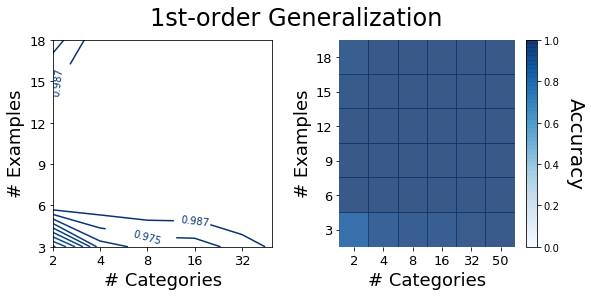

In [27]:
plot_results(
    results_O1.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='1st-order Generalization',
    nb_lines=80,
    size=(9,4.5),
    cmap=plt.cm.Blues
)

In [28]:
print('2nd-order: ')
get_df(results_O2.mean(axis=2), category_trials, exemplar_trials)

2nd-order: 


,2,4,8,16,32,50
3,0.6708,0.7956,0.9035,0.8925,0.9646,0.9828
6,0.7146,0.9649,0.9875,0.9968,1,1
9,0.8182,0.9864,0.9962,0.9999,1,1
12,0.7683,0.9804,0.9999,1,1,1
15,0.8709,0.9995,1,1,1,1
18,0.8491,0.9961,1,1,1,1


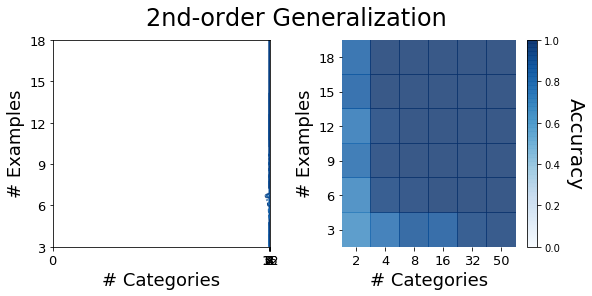

In [8]:
plot_results(
    results_O2.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='2nd-order Generalization',
    nb_lines=20,
    size=(9,4.5)
)

# CNN Results

In [29]:
folder = '../results/cnn_results/'
results_O1 = np.load(os.path.join(folder, 'results_O1.npy'))
results_O2 = np.load(os.path.join(folder, 'results_O2.npy'))
category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

In [30]:
print('1st-order: ')
get_df(results_O1.mean(axis=2), category_trials, exemplar_trials)

1st-order: 


,2,4,8,16,32,50
3,0.5631,0.6555,0.7513,0.7702,0.7896,0.7723
6,0.6208,0.8397,0.8881,0.9181,0.9312,0.9448
9,0.6676,0.8438,0.9267,0.9533,0.9586,0.9602
12,0.6951,0.9084,0.9454,0.9729,0.9733,0.9811
15,0.6826,0.9081,0.9598,0.9809,0.9797,0.9845
18,0.7258,0.9179,0.956,0.984,0.9814,0.9843


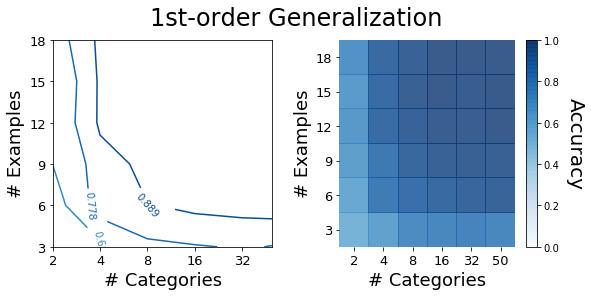

In [11]:
plot_results(
    results_O1.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='1st-order Generalization',
    nb_lines=10,
    size=(9,4.5)
)

In [31]:
print('2nd-order: ')
get_df(results_O2.mean(axis=2), category_trials, exemplar_trials)

2nd-order: 


,2,4,8,16,32,50
3,0.3884,0.5161,0.5933,0.6586,0.7395,0.7525
6,0.4351,0.6422,0.749,0.7968,0.8986,0.9181
9,0.4298,0.6367,0.8116,0.8781,0.906,0.9429
12,0.4647,0.6983,0.8214,0.9128,0.9296,0.9608
15,0.4344,0.6809,0.8591,0.9103,0.952,0.9757
18,0.4725,0.7618,0.8328,0.8979,0.9449,0.9587


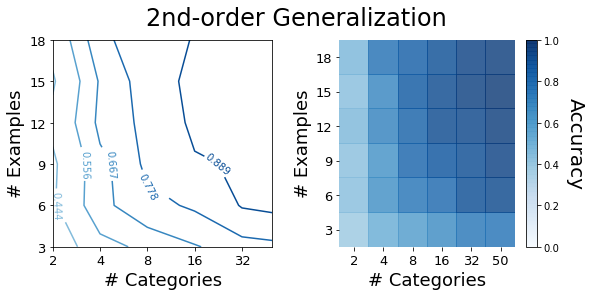

In [36]:
plot_results(
    results_O2.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='2nd-order Generalization',
    nb_lines=10,
    size=(9,4.5)
)

# Additional experiments... train CNN for color

In [10]:
folder = '../results/cnn_results_color/'
results_O1 = np.load(os.path.join(folder, 'results_O1.npy'))
results_O2 = np.load(os.path.join(folder, 'results_O2.npy'))
category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

In [15]:
print('1st-order: ')
get_df(results_O1.mean(axis=2), category_trials, exemplar_trials)

1st-order: 


,2,4,8,16,32,50
3,0.7666,0.7859,0.8988,0.8611,0.8245,0.8633
6,0.8424,0.916,0.9505,0.9619,0.9722,0.9823
9,0.7516,0.9013,0.9725,0.9687,0.9849,0.9928
12,0.7772,0.914,0.9756,0.9897,0.9904,0.9949
15,0.8645,0.919,0.9814,0.9892,0.9942,0.9961
18,0.8359,0.9107,0.9657,0.9896,0.9953,0.9931


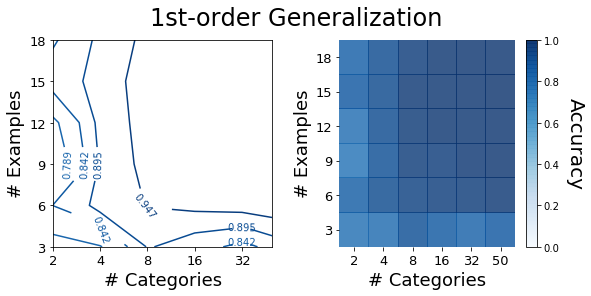

In [9]:
plot_results(
    results_O1.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='1st-order Generalization',
    nb_lines=20,
    size=(9,4.5),
    savefile='../../cogsci-paper-arxiv/anc/cnn_o1_acc_color.pdf'
)

In [11]:
print('2nd-order: ')
get_df(results_O2.mean(axis=2), category_trials, exemplar_trials)

2nd-order: 


,2,4,8,16,32,50
3,0.7289,0.8334,0.8985,0.8475,0.8429,0.8865
6,0.7469,0.9216,0.9208,0.9677,0.9715,0.9864
9,0.7022,0.9367,0.976,0.9731,0.9858,0.9952
12,0.7168,0.9184,0.9557,0.989,0.9902,0.997
15,0.7643,0.9251,0.9585,0.9867,0.9925,0.9951
18,0.7744,0.9477,0.972,0.9955,0.9946,0.988


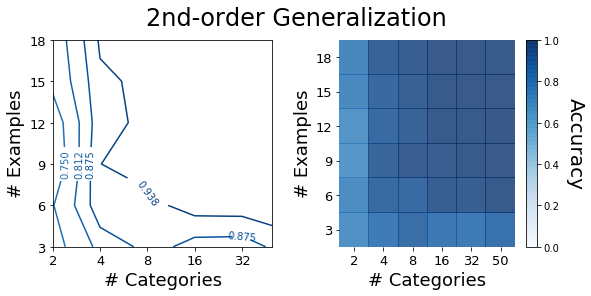

In [8]:
plot_results(
    results_O2.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='2nd-order Generalization',
    nb_lines=17,
    size=(9,4.5),
    savefile='../../cogsci-paper-arxiv/anc/cnn_o2_acc_color.pdf'
)